In [18]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# Загрузка файла
data_source = 'Mall_Customers.csv'  # Укажите имя вашего файла
data = pd.read_csv(data_source)

# Преобразование категориального признака 'Genre' в числовой
label_encoder_genre = LabelEncoder()
data['Genre'] = label_encoder_genre.fit_transform(data['Genre'])  # Преобразуем 'Genre' (Male=1, Female=0)

# Выбор признаков и целевой переменной
# Например, предположим, что целевой признак — Spending Score (1-100)
X = data.drop(columns=['CustomerID', 'Spending Score (1-100)'])  # Признаки
y = data['Spending Score (1-100)']  # Целевая переменная

# Проверка данных
print("Признаки (X):")
print(X.head())
print("\nЦелевой признак (y):")
print(y.head())


Признаки (X):
   Genre  Age  Annual Income (k$)
0      1   19                  15
1      1   21                  15
2      0   20                  16
3      0   23                  16
4      0   31                  17

Целевой признак (y):
0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64


In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.preprocessing import LabelEncoder

# Преобразование категориальных данных (например, 'Genre' — мужской/женский)
label_encoder_genre = LabelEncoder()
data['Genre'] = label_encoder_genre.fit_transform(data['Genre'])  # Преобразуем 'Genre'

# Отбор признаков и целевой переменной
X = data.drop(columns=['CustomerID', 'Spending Score (1-100)'])  # Признаки (без CustomerID и целевого признака)
y = data['Spending Score (1-100)']  # Целевая переменная (Spending Score)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Параметры дерева
max_depth = 5
max_features = 3

# Построение дерева решений
tree_clf = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, random_state=42)
tree_clf.fit(X_train, y_train)

# Прогнозирование и оценка точности
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy * 100:.2f}%")

# Визуализация дерева решений
dot_data = export_graphviz(
    tree_clf, out_file=None,
    feature_names=X.columns,  # Признаки
    class_names=[str(i) for i in y.unique()],  # Метки классов (Spending Score)
    filled=True, rounded=True,
    special_characters=True
)

# Создание и сохранение изображения дерева в формате PNG
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")  # Сохранение дерева в формате PNG
print("Дерево сохранено в формате PNG.")


Точность модели: 1.67%
Дерево сохранено в формате PNG.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

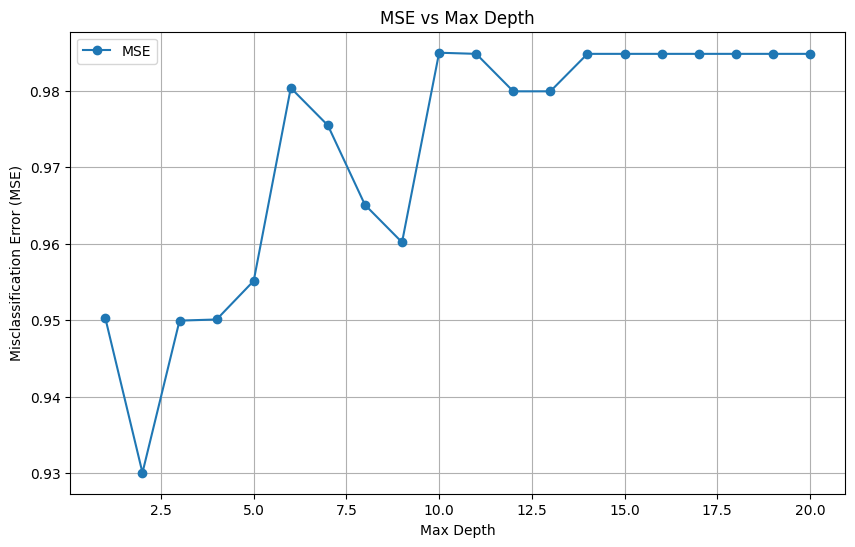

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Тестирование разных значений max_depth
depth_range = range(1, 21)  # Диапазон значений max_depth от 1 до 20
mse_scores_depth = []  # Список для хранения значений ошибки классификации (MSE) для каждой глубины

# Перебираем все значения max_depth из заданного диапазона
for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    # Оценка точности модели с кросс-валидацией (6 фолдов)
    scores = cross_val_score(clf, X, y, cv=6, scoring='accuracy')
    # Вычисление средней ошибки классификации (MSE = 1 - accuracy)
    mse_scores_depth.append(1 - scores.mean())

# График зависимости MSE от max_depth
plt.figure(figsize=(10, 6))
plt.plot(depth_range, mse_scores_depth, marker='o', label="MSE")
plt.xlabel('Max Depth')
plt.ylabel('Misclassification Error (MSE)')
plt.title('MSE vs Max Depth')
plt.legend()  # Добавляем легенду
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


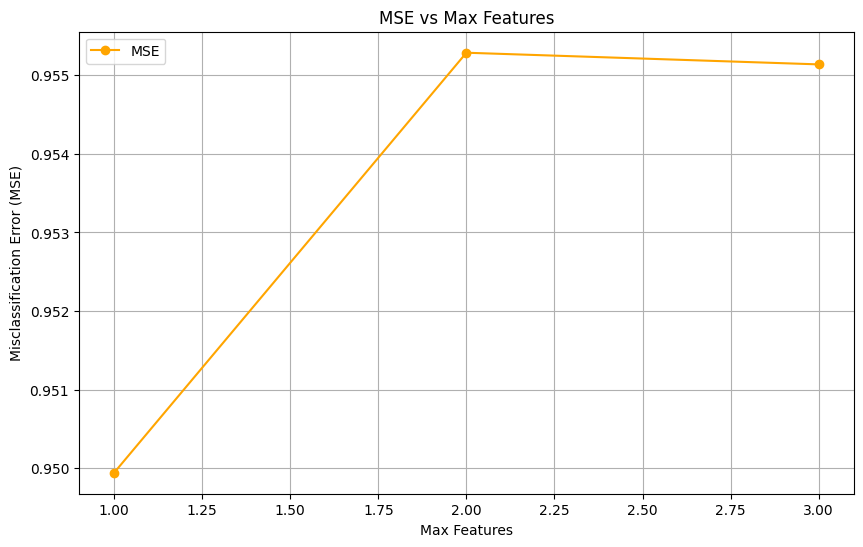

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Тестирование разных значений max_features
features_range = range(1, X.shape[1] + 1)  # Диапазон значений max_features от 1 до общего числа признаков
mse_scores_features = []  # Список для хранения значений ошибки классификации (MSE) для каждого количества признаков

# Перебираем все значения max_features
for features in features_range:
    clf = DecisionTreeClassifier(max_depth=5, max_features=features, random_state=42)  # Установим max_depth для стабильности
    scores = cross_val_score(clf, X, y, cv=6, scoring='accuracy')  # Кросс-валидация с 6 фолдами
    mse_scores_features.append(1 - scores.mean())  # MSE = 1 - accuracy

# График зависимости MSE от max_features
plt.figure(figsize=(10, 6))
plt.plot(features_range, mse_scores_features, marker='o', color='orange', label="MSE")
plt.xlabel('Max Features')
plt.ylabel('Misclassification Error (MSE)')
plt.title('MSE vs Max Features')
plt.legend()  # Добавляем легенду
plt.grid()
plt.show()


In [23]:
print("Столбцы признаков (X):", X.columns.tolist())  # Преобразует объект Index в список
print("Количество признаков в X:", X.shape[1])  # Возвращает количество признаков в X

Столбцы признаков (X): ['Genre', 'Age', 'Annual Income (k$)']
Количество признаков в X: 3


In [24]:
# Оптимальные значения max_depth и max_features (минимум MSE)
optimal_depth = depth_range[mse_scores_depth.index(min(mse_scores_depth))]
optimal_features = features_range[mse_scores_features.index(min(mse_scores_features))]

# Вывод оптимальных значений
print(f"Оптимальное значение max_depth: {optimal_depth}")
print(f"Оптимальное значение max_features: {optimal_features}")

Оптимальное значение max_depth: 2
Оптимальное значение max_features: 1


In [25]:
# Построение дерева с оптимальными параметрами
optimal_tree_clf = DecisionTreeClassifier(max_depth=optimal_depth, max_features=optimal_features, random_state=42)

# Обучаем дерево решений на тренировочном наборе данных
optimal_tree_clf.fit(X_train, y_train)

# Визуализация дерева
dot_data = export_graphviz(
    optimal_tree_clf, out_file=None,
    feature_names=X.columns,  # Используем имена признаков из X
    class_names=[str(i) for i in sorted(y.unique())],  # Имя классов, преобразуем в строки для числовых значений
    filled=True, rounded=True,
    special_characters=True
)

# Преобразуем текст в формате DOT в объект графа для визуализации
graph = graphviz.Source(dot_data)

# Сохранение в формате PNG
graph.render("optimal_decision_tree", format="png")
print("Оптимальное дерево сохранено в формате PNG.")

Оптимальное дерево сохранено в формате PNG.


<ipython-input-27-a2592589b6f4>:77: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


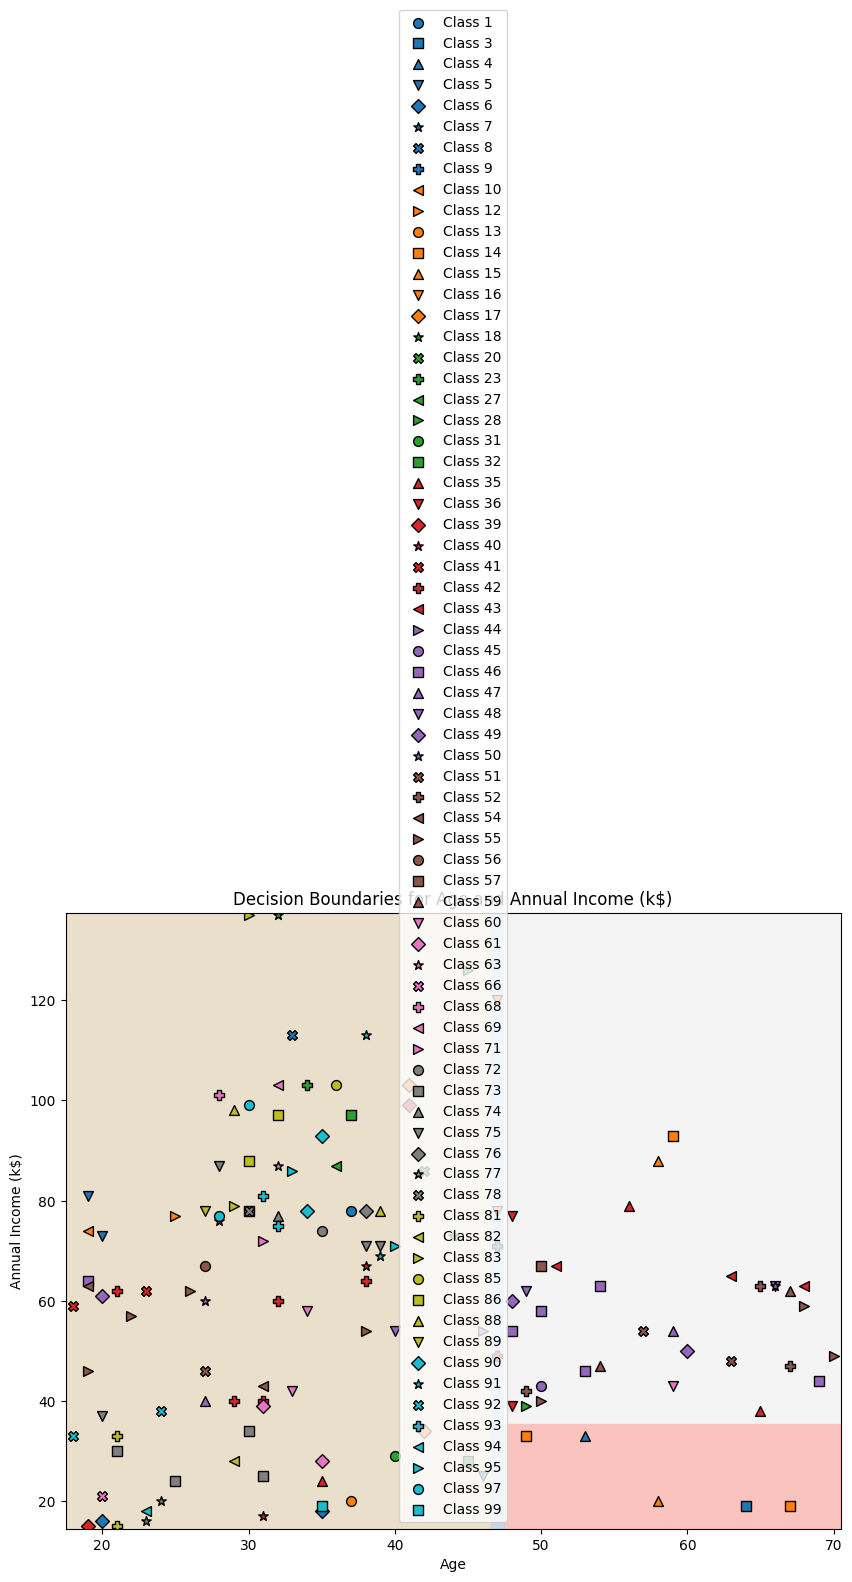

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Преобразование категориальных данных, если нужно (например, 'Genre' — мужской/женский)
from sklearn.preprocessing import LabelEncoder
label_encoder_genre = LabelEncoder()
data['Genre'] = label_encoder_genre.fit_transform(data['Genre'])  # Преобразуем 'Genre'

# Отбор признаков и целевой переменной
X = data[['Age', 'Annual Income (k$)']]  # Выбираем два признака
y = data['Spending Score (1-100)']  # Целевая переменная (Spending Score)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Генерация маркеров и цветов для визуализации
answers = np.unique(y_train)  # Уникальные классы
plot_colors = plt.cm.tab10(np.linspace(0, 1, len(answers)))  # Динамическая палитра цветов
plot_markers = ['o', 's', '^', 'v', 'D', '*', 'X', 'P', '<', '>']  # Запас маркеров для точек

# Параметры построения
fmin = X_train.min() - 0.5  # Минимум для сетки с небольшим отступом
fmax = X_train.max() + 0.5  # Максимум для сетки с небольшим отступом
plot_step = 0.02  # Шаг сетки

# Создаем координатную сетку для отображения границ классификации
xx, yy = np.meshgrid(
    np.arange(fmin['Age'], fmax['Age'], plot_step),
    np.arange(fmin['Annual Income (k$)'], fmax['Annual Income (k$)'], plot_step)
)

# Создаем и обучаем модель дерева решений
model = DecisionTreeClassifier(max_depth=optimal_depth, max_features=optimal_features, random_state=42)
model.fit(X_train, y_train)

# Преобразуем сетку координат в DataFrame
grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['Age', 'Annual Income (k$)'])
# Предсказываем классы для всех точек сетки
predictions = model.predict(grid_points)

# Преобразуем предсказания в числовой формат
predictions_numeric = np.zeros_like(predictions, dtype=int)
for idx, label in enumerate(answers):
    predictions_numeric[predictions == label] = idx

# Формируем карту предсказаний
predictions_numeric = predictions_numeric.reshape(xx.shape)

# Построение графика, настраиваем размеры
plt.figure(figsize=(10, 8))

# Отображаем границы классификации как заливку цветами (contourf)
plt.contourf(xx, yy, predictions_numeric, cmap='Pastel1', alpha=0.8)

# Отображаем данные (обучающую выборку)
for id_answer, answer in enumerate(answers):
    idx = np.where(y_train == answer)[0]  # Индексы точек для текущего класса
    plt.scatter(
        X_train.iloc[idx, 0],  # Значения для 'Age'
        X_train.iloc[idx, 1],  # Значения для 'Annual Income (k$)'
        c=[plot_colors[id_answer]],
        label=f"Class {answer}",
        marker=plot_markers[id_answer % len(plot_markers)],  # Выбираем маркер для текущего класса
        edgecolor='k',  # Черный контур вокруг маркеров
        s=50  # Размер точек
    )

# Подписи осей и заголовок
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Decision Boundaries for Age and Annual Income (k$)')
plt.legend()
plt.tight_layout()
plt.show()
